# Project - Windspeed Analysis

Author: Céaman Collins

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt

In [ ]:
mace_head = pd.read_csv('data/hly275.csv', parse_dates=['date'], index_col='Date', skiprows=17)

C:\Users\luxxx\AppData\Local\Temp\ipykernel_3156\2235875065.py:1: DtypeWarning: Columns (2,4,6,7,8,9,10,12,14) have mixed types. Specify dtype option on import or set low_memory=False.
  mace_head = pd.read_csv('data/hly275.csv', parse_dates=['date'], index_col='date', skiprows=17)
C:\Users\luxxx\AppData\Local\Temp\ipykernel_3156\2235875065.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  mace_head = pd.read_csv('data/hly275.csv', parse_dates=['date'], index_col='date', skiprows=17)


In [16]:
mace_head.head()

,ind,rain,ind.1,temp,ind.2,wetb,dewpt,vappr,rhum,msl,ind.3,wdsp,ind.4,wddir
date,,,,,,,,,,,,,,
2003-08-13 01:00:00,-1,,4,,4,,,,,,7,,7,
2003-08-13 02:00:00,-1,,4,,4,,,,,,7,,7,
2003-08-13 03:00:00,-1,,4,,4,,,,,,7,,7,
2003-08-13 04:00:00,-1,,4,,4,,,,,,7,,7,
2003-08-13 05:00:00,-1,,4,,4,,,,,,7,,7,


In [ ]:
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.replace.html
mace_head.replace(to_replace=' ', value=np.nan, inplace=True)

In [21]:
mace_head.head()

,ind,rain,ind.1,temp,ind.2,wetb,dewpt,vappr,rhum,msl,ind.3,wdsp,ind.4,wddir
date,,,,,,,,,,,,,,
2003-08-13 01:00:00,-1,NaN,4,NaN,4,NaN,NaN,NaN,NaN,NaN,7,NaN,7,NaN
2003-08-13 02:00:00,-1,NaN,4,NaN,4,NaN,NaN,NaN,NaN,NaN,7,NaN,7,NaN
2003-08-13 03:00:00,-1,NaN,4,NaN,4,NaN,NaN,NaN,NaN,NaN,7,NaN,7,NaN
2003-08-13 04:00:00,-1,NaN,4,NaN,4,NaN,NaN,NaN,NaN,NaN,7,NaN,7,NaN
2003-08-13 05:00:00,-1,NaN,4,NaN,4,NaN,NaN,NaN,NaN,NaN,7,NaN,7,NaN


In [22]:
mace_head.dropna(inplace=True)

In [23]:
mace_head.head()

,ind,rain,ind.1,temp,ind.2,wetb,dewpt,vappr,rhum,msl,ind.3,wdsp,ind.4,wddir
date,,,,,,,,,,,,,,
2003-08-14 01:00:00,0,0.0,0,10.9,0,9.9,8.9,11.4,87,1024.2,2,6,2,70
2003-08-14 02:00:00,0,0.0,0,10.7,0,9.6,8.5,11.1,86,1024.0,2,4,2,80
2003-08-14 03:00:00,0,0.0,0,10.2,0,9.1,8.0,10.7,86,1024.0,2,3,2,60
2003-08-14 04:00:00,0,0.0,0,9.5,0,8.7,7.9,10.7,90,1023.8,2,5,2,70
2003-08-14 05:00:00,0,0.0,0,9.2,0,8.6,8.0,10.7,92,1023.7,2,6,2,80


In [27]:
mace_head['wdsp'] = pd.to_numeric(mace_head['wdsp'])

In [37]:
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.resample.html
mace_head_wdsp_resampled = mace_head['wdsp'].resample('MS').mean()

In [38]:
mace_head_wdsp_resampled.tail()

date
2025-07-01    12.540323
2025-08-01    13.763441
2025-09-01    17.184722
2025-10-01    17.491935
2025-11-01    18.000000
Freq: MS, Name: wdsp, dtype: float64

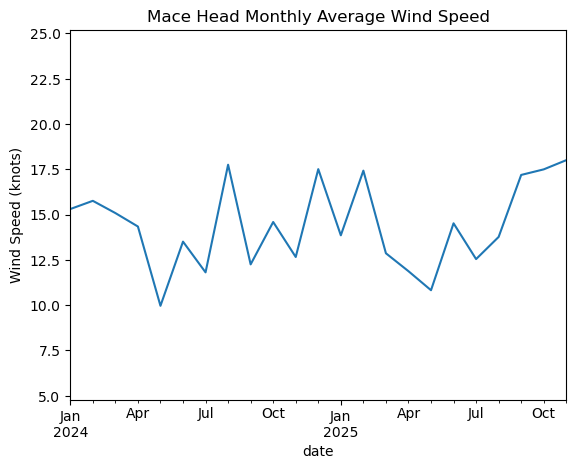

In [42]:
mace_head_wdsp_resampled.plot(title='Mace Head Monthly Average Wind Speed')
plt.ylabel('Wind Speed (knots)')
plt.xlim('2024-01-01', '2025-11-01')
plt.show()
plt.close()

https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/

In [45]:
model = ARIMA(mace_head_wdsp_resampled, order=(5,1,0))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                   wdsp   No. Observations:                  268
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -667.704
Date:                Sun, 23 Nov 2025   AIC                           1347.409
Time:                        20:38:07   BIC                           1368.932
Sample:                    08-01-2003   HQIC                          1356.055
                         - 11-01-2025                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3834      0.059     -6.445      0.000      -0.500      -0.267
ar.L2         -0.1975      0.066     -2.975      0.003      -0.328      -0.067
ar.L3         -0.1230      0.068     -1.818      0.0

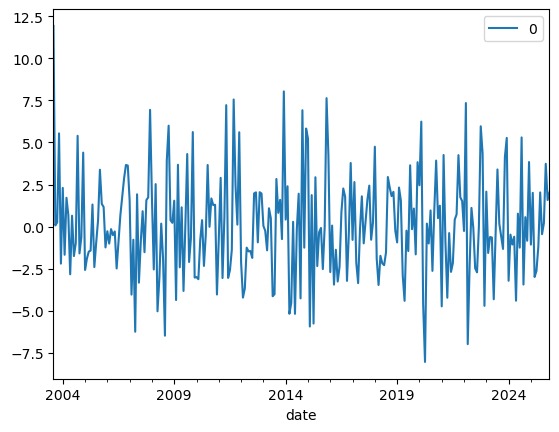

In [48]:
residuals = pd.DataFrame(model_fit.resid)
residuals.plot(label='Residuals from ARIMA Model')
plt.show()
plt.close()

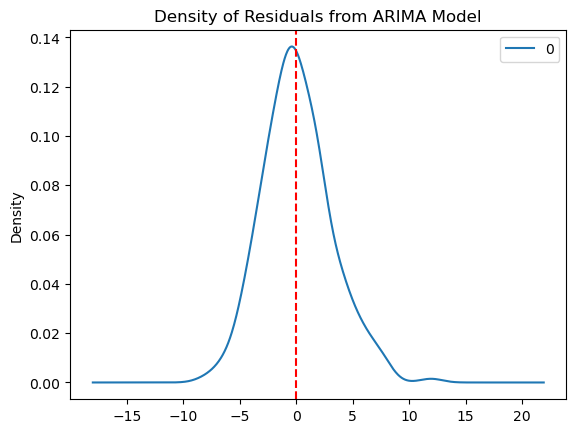

In [52]:
residuals.plot(kind='kde', title='Density of Residuals from ARIMA Model')
plt.axvline(x=0, color='red', linestyle='--')
plt.show()
plt.close()

In [82]:
X = mace_head_wdsp_resampled.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = []
for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print(f'predicted={yhat}, expected={obs}')
rmse = sqrt(mean_squared_error(test, predictions))
print(f'Test RMSE: {rmse}')


predicted=15.477844173706936, expected=13.434722222222222
predicted=13.722200213851398, expected=11.97983870967742
predicted=12.072428126395355, expected=10.01388888888889
predicted=12.022900044004812, expected=10.329301075268818
predicted=11.257442145461074, expected=14.279569892473118
predicted=12.935527519247957, expected=15.318055555555556
predicted=14.651346785008895, expected=16.25537634408602
predicted=15.922717501709919, expected=17.60972222222222
predicted=16.562945158639074, expected=16.322580645161292
predicted=15.590428642289684, expected=14.756720430107526
predicted=15.188814226428006, expected=17.546130952380953
predicted=16.569453845861975, expected=18.278225806451612
predicted=17.394453067710188, expected=14.569444444444445
predicted=16.0415892150436, expected=11.39516129032258
predicted=13.313378823067993, expected=13.180555555555555
predicted=12.680728978416514, expected=11.608870967741936
predicted=12.08813843387341, expected=15.918010752688172
predicted=15.583805688

Text(0.5, 0, 'Time')

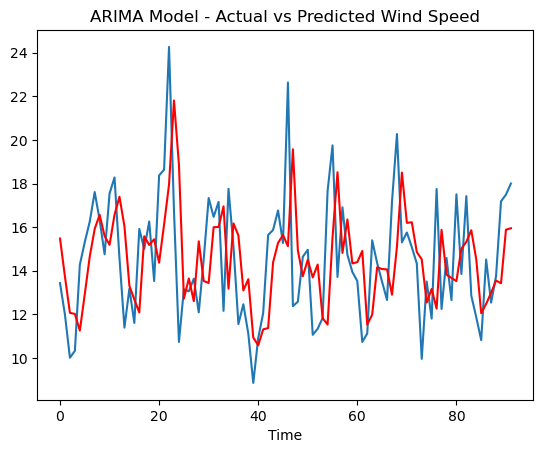

In [81]:
plt.plot(test, label='Actual Wind Speed')
plt.plot(predictions, color='red', label='Predicted Wind Speed')
plt.title('ARIMA Model - Actual vs Predicted Wind Speed')
plt.xlabel('Time')

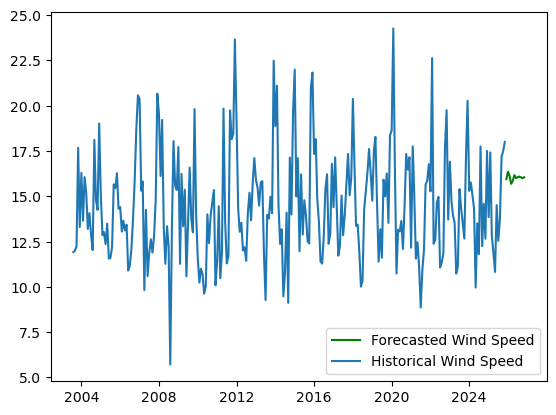

In [85]:
forecast = model_fit.get_forecast(steps=12)
forecast_index = pd.date_range(start=mace_head_wdsp_resampled.index[-1], periods=13, freq='MS')[1:]
forecast_series = pd.Series(forecast.predicted_mean, index=forecast_index)
plt.plot(forecast_series, color='green', label='Forecasted Wind Speed')
plt.plot(mace_head_wdsp_resampled, label='Historical Wind Speed')
# plt.xlim('2024-01-01', '2026-12-01')
plt.legend()

ConversionError: Failed to convert value(s) to axis units: '2026-01'

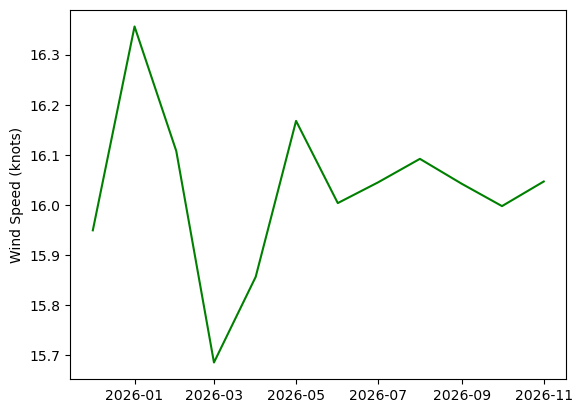

In [78]:
# mace_head_wdsp_resampled.plot(title='Mace Head Monthly Average Wind Speed')
plt.plot(forecast_series, color='green', label='Forecasted Wind Speed')
plt.ylabel('Wind Speed (knots)')
plt.xlim('2026-01', '2026-11')
plt.show()
plt.close()

The model could use further tuning of the p, d, and maybe even the q parameters.

seaborn relplot
distribution of averages, by month, is it normal mean and variance of each month, year
t test to see if months are the same or different
strip plots seaborn
box plots
